In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 
from pylab import rcParams
from sklearn import preprocessing 
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import AgglomerativeClustering
import scipy 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import precision_score, recall_score
import seaborn as sb
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.decomposition import FactorAnalysis

In [73]:
%matplotlib inline 
rcParams['figure.figsize']=10,8

In [85]:
# Load the data
Glass_data = pd.read_csv (r'Ahmed Project\ML AHMED\glass_data.csv')
Glass_data.columns = ['Id', 'refractive_index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Type_of_glass']

Glass_data.head()

,Id,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [86]:
Glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
Id                  214 non-null int64
refractive_index    214 non-null float64
Sodium              214 non-null float64
Magnesium           214 non-null float64
Aluminum            214 non-null float64
Silicon             214 non-null float64
Potassium           214 non-null float64
Calcium             214 non-null float64
Barium              214 non-null float64
Iron                214 non-null float64
Type_of_glass       214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [87]:
Glass_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
refractive_index,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Sodium,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Magnesium,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Aluminum,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Silicon,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
Potassium,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Calcium,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Barium,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Iron,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


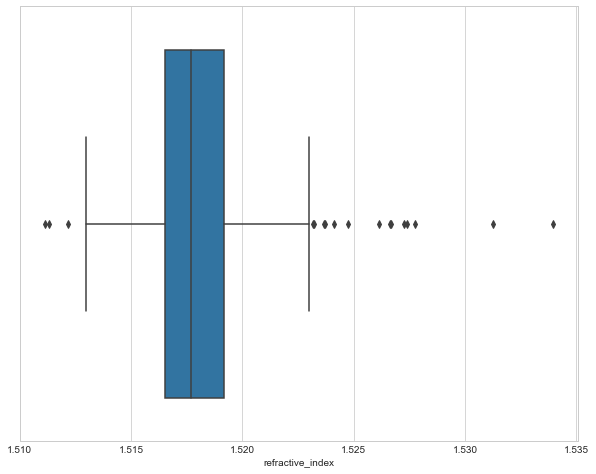

In [96]:
#  Look for outliers 
sb.boxplot(x=Glass_data['refractive_index']);

In [106]:
# see where the outliers are located for each variable 
a = Glass_data['refractive_index']
a_Q1 = a.quantile(0.25)
a_Q3 = a.quantile(0.75)
a_IQR = a_Q3 - a_Q1
a_lowerend = a_Q1 - (1.5 * a_IQR)
a_upperend = a_Q3 + (1.5 * a_IQR)
a_outliers = a[(a < a_lowerend) | (a > a_upperend)]
a_outliers

47     1.52667
50     1.52320
56     1.51215
103    1.52725
104    1.52410
105    1.52475
106    1.53125
107    1.53393
110    1.52664
111    1.52739
112    1.52777
131    1.52614
170    1.52369
184    1.51115
185    1.51131
187    1.52315
189    1.52365
Name: refractive_index, dtype: float64

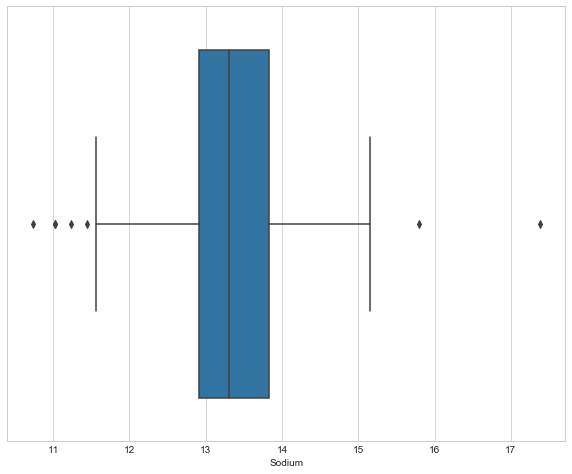

In [97]:
sb.boxplot(x=Glass_data['Sodium']);

In [107]:
a = Glass_data['Sodium']
a_Q1 = a.quantile(0.25)
a_Q3 = a.quantile(0.75)
a_IQR = a_Q3 - a_Q1
a_lowerend = a_Q1 - (1.5 * a_IQR)
a_upperend = a_Q3 + (1.5 * a_IQR)
a_outliers = a[(a < a_lowerend) | (a > a_upperend)]
a_outliers

105    11.45
106    10.73
110    11.23
111    11.02
166    11.03
184    17.38
189    15.79
Name: Sodium, dtype: float64

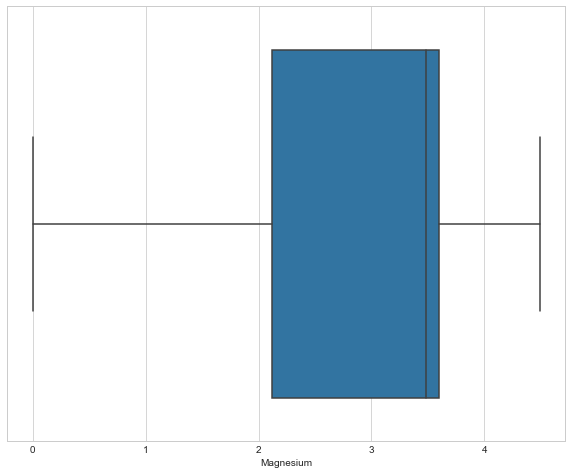

In [98]:
sb.boxplot(x=Glass_data['Magnesium']);

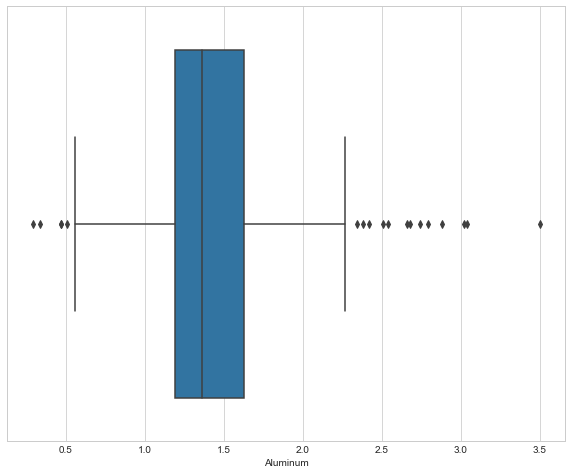

In [99]:
sb.boxplot(x=Glass_data['Aluminum']);

In [109]:
a = Glass_data['Aluminum']
a_Q1 = a.quantile(0.25)
a_Q3 = a.quantile(0.75)
a_IQR = a_Q3 - a_Q1
a_lowerend = a_Q1 - (1.5 * a_IQR)
a_upperend = a_Q3 + (1.5 * a_IQR)
a_outliers = a[(a < a_lowerend) | (a > a_upperend)]
a_outliers

21     0.29
38     0.47
39     0.47
50     0.51
163    3.50
171    3.04
172    3.02
184    0.34
191    2.38
192    2.79
195    2.68
196    2.54
197    2.34
198    2.66
199    2.51
202    2.42
208    2.74
209    2.88
Name: Aluminum, dtype: float64

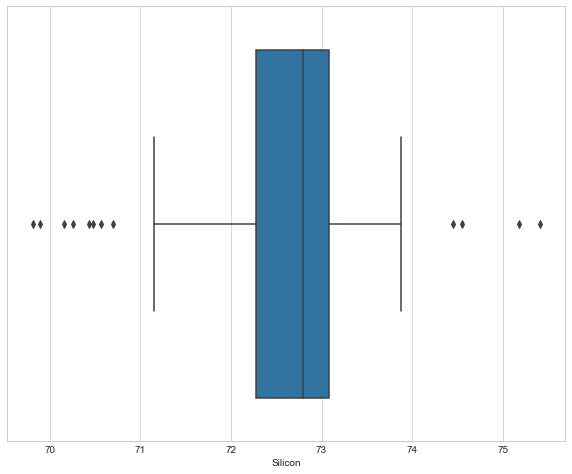

In [100]:
sb.boxplot(x=Glass_data['Silicon']);


In [110]:
a = Glass_data['Silicon']
a_Q1 = a.quantile(0.25)
a_Q3 = a.quantile(0.75)
a_IQR = a_Q3 - a_Q1
a_lowerend = a_Q1 - (1.5 * a_IQR)
a_upperend = a_Q3 + (1.5 * a_IQR)
a_outliers = a[(a < a_lowerend) | (a > a_upperend)]
a_outliers

103    70.57
106    69.81
107    70.16
109    74.45
163    69.89
171    70.48
172    70.70
180    74.55
184    75.41
188    70.26
189    70.43
201    75.18
Name: Silicon, dtype: float64

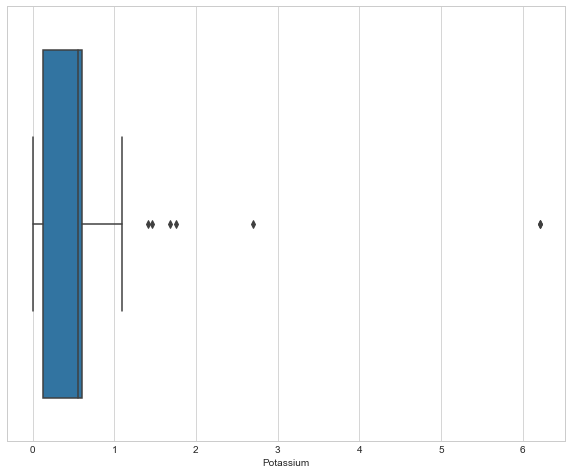

In [101]:
sb.boxplot(x=Glass_data['Potassium']);

In [111]:
a = Glass_data['Potassium']
a_Q1 = a.quantile(0.25)
a_Q3 = a.quantile(0.75)
a_IQR = a_Q3 - a_Q1
a_lowerend = a_Q1 - (1.5 * a_IQR)
a_upperend = a_Q3 + (1.5 * a_IQR)
a_outliers = a[(a < a_lowerend) | (a > a_upperend)]
a_outliers

163    1.68
171    6.21
172    6.21
185    1.76
186    1.46
201    2.70
207    1.41
Name: Potassium, dtype: float64

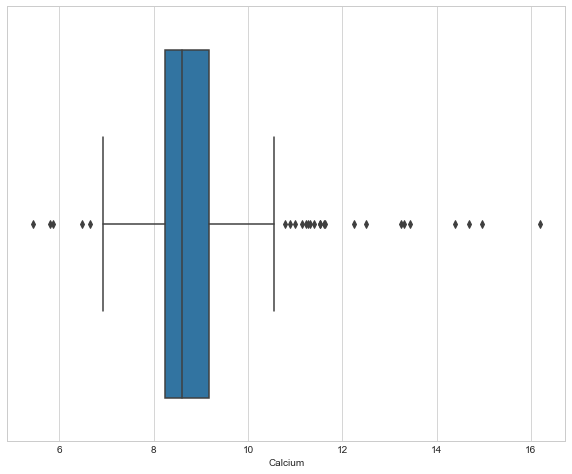

In [102]:
sb.boxplot(x=Glass_data['Calcium']);


In [112]:
a = Glass_data['Calcium']
a_Q1 = a.quantile(0.25)
a_Q3 = a.quantile(0.75)
a_IQR = a_Q3 - a_Q1
a_lowerend = a_Q1 - (1.5 * a_IQR)
a_upperend = a_Q3 + (1.5 * a_IQR)
a_outliers = a[(a < a_lowerend) | (a > a_upperend)]
a_outliers

103    11.64
104    10.79
105    13.24
106    13.30
107    16.19
108    11.52
109    10.99
110    14.68
111    14.96
112    14.40
130    11.14
131    13.44
163     5.87
165    11.41
166    11.62
167    11.53
169    11.32
170    12.24
173    12.50
175    11.27
182    10.88
183    11.22
184     6.65
185     5.43
186     5.79
207     6.47
Name: Calcium, dtype: float64

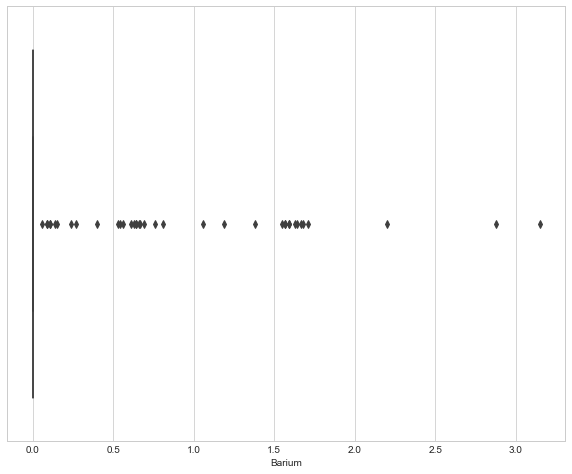

In [103]:
sb.boxplot(x=Glass_data['Barium']);


In [113]:
a = Glass_data['Barium']
a_Q1 = a.quantile(0.25)
a_Q3 = a.quantile(0.75)
a_IQR = a_Q3 - a_Q1
a_lowerend = a_Q1 - (1.5 * a_IQR)
a_upperend = a_Q3 + (1.5 * a_IQR)
a_outliers = a[(a < a_lowerend) | (a > a_upperend)]
a_outliers

32     0.09
36     0.11
61     0.69
99     0.14
100    0.11
106    3.15
128    0.27
141    0.09
142    0.06
161    0.15
163    2.20
174    0.24
185    1.19
186    1.63
189    1.68
190    0.76
191    0.64
192    0.40
193    1.59
194    1.57
195    0.61
196    0.81
197    0.66
198    0.64
199    0.53
200    0.63
202    0.56
203    1.71
204    0.67
205    1.55
206    1.38
207    2.88
208    0.54
209    1.06
210    1.59
211    1.64
212    1.57
213    1.67
Name: Barium, dtype: float64

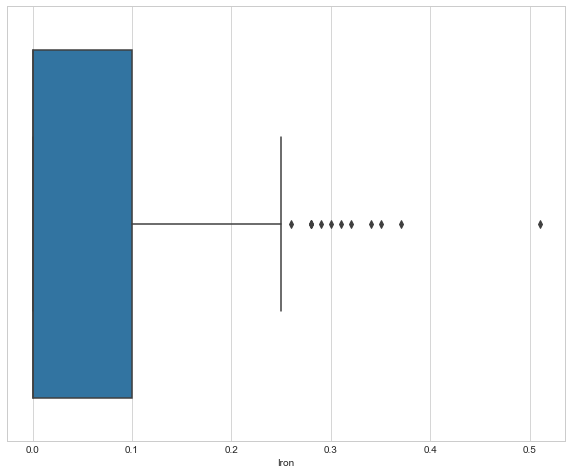

In [104]:
sb.boxplot(x=Glass_data['Iron']);


In [114]:
a = Glass_data['Iron']
a_Q1 = a.quantile(0.25)
a_Q3 = a.quantile(0.75)
a_IQR = a_Q3 - a_Q1
a_lowerend = a_Q1 - (1.5 * a_IQR)
a_upperend = a_Q3 + (1.5 * a_IQR)
a_outliers = a[(a < a_lowerend) | (a > a_upperend)]
a_outliers

5      0.26
44     0.30
56     0.31
71     0.32
105    0.34
106    0.28
118    0.29
135    0.28
145    0.35
162    0.37
174    0.51
175    0.28
Name: Iron, dtype: float64

In [441]:
# removing the ourliers 
Glass_data2 = Glass_data.drop([103,105,106,107,109,110,111,163,166,171,172,184,185,186,188,189,201,207])
Glass_data2.describe().T



,count,mean,std,min,25%,50%,75%,max
Id,196.0,103.183673,61.885808,1.00000,49.750000,98.500000,154.25000,214.00000
refractive_index,196.0,1.518143,0.002324,1.51215,1.516542,1.517635,1.51905,1.52777
Sodium,196.0,13.426480,0.660789,11.56000,12.930000,13.300000,13.79500,15.15000
Magnesium,196.0,2.839082,1.352057,0.00000,2.797500,3.500000,3.61250,4.49000
Aluminum,196.0,1.426633,0.441769,0.29000,1.190000,1.360000,1.61250,2.88000
Silicon,196.0,72.709796,0.559755,71.15000,72.355000,72.800000,73.08250,74.55000
Potassium,196.0,0.416837,0.257557,0.00000,0.130000,0.550000,0.60000,1.10000
Calcium,196.0,8.871276,1.014913,7.08000,8.270000,8.595000,9.09250,14.40000
Barium,196.0,0.126173,0.366158,0.00000,0.000000,0.000000,0.00000,1.71000
Iron,196.0,0.057857,0.096346,0.00000,0.000000,0.000000,0.10000,0.51000


In [442]:
# choose the variables we want and the ones we are trying to predict
x= Glass_data2[['Sodium','Silicon','Potassium','Iron','refractive_index']].values
y=Glass_data2[['Type_of_glass']]


In [457]:
# use factor analysis to see what factors affect the variables so that it can be dropped if not needed
factor=FactorAnalysis().fit(x)
column=['Sodium','Silicon','Potassium','Iron','refractive_index']
DF=pd.DataFrame(factor.components_,columns=column)
DF

,Sodium,Silicon,Potassium,Iron,refractive_index
0,0.349954,-0.251223,-0.150614,-0.013962,0.001097
1,0.191269,0.194791,-0.054486,-0.027871,-0.000801
2,0.000000,0.000000,-0.000000,0.000000,-0.000000
3,0.000000,-0.000000,0.000000,0.000000,-0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000


In [443]:
# use DBSCAN to look for the effect of outliers 
model = DBSCAN(eps=0.8,  min_samples=19).fit(x)
print(model)   

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)


In [444]:
# define the ourliers values (-1 values)
outliers_df = pd.DataFrame(x)

print(Counter(model.labels_))

print(outliers_df[model.labels_ ==-1])

Counter({0: 195, -1: 1})
        0      1    2    3        4
169  14.4  74.55  0.0  0.0  1.51299


Text(0.5,1,'DBSCAN for Outlier Detection')

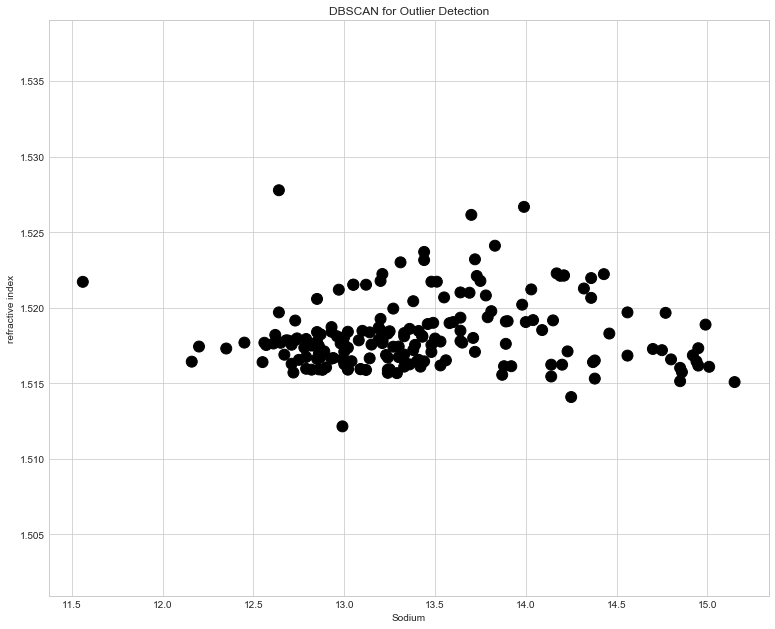

In [439]:
# plot the outliers for sodium and refractive index 
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(x[:,0], x[:,-1], c=colors, s=120)
ax.set_xlabel('Sodium')
ax.set_ylabel('refractive index')
plt.title('DBSCAN for Outlier Detection')

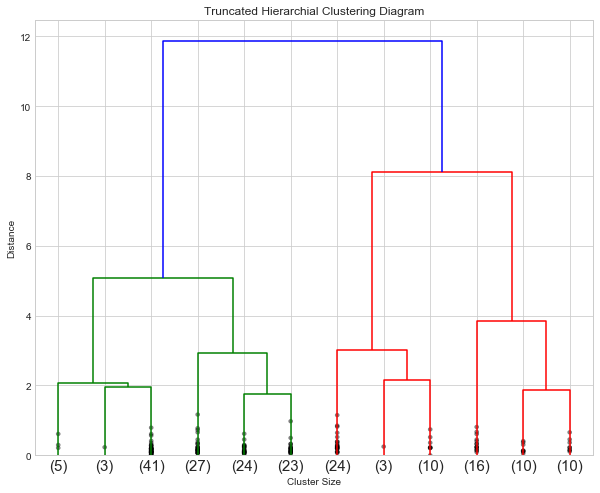

In [426]:
# create dendrogram for our variables 
z=linkage(x,'ward')
dendrogram(z,truncate_mode='lastp',p=12,leaf_font_size=15,show_contracted=True)
plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

In [430]:
# cluster the variables using diffrent linkages 
k=3

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(x)

sm.accuracy_score(y, Hclustering.labels_)

0.066326530612244902

In [431]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(x)

sm.accuracy_score(y, Hclustering.labels_)

0.015306122448979591

In [432]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(x)

sm.accuracy_score(y, Hclustering.labels_)


0.39795918367346939

In [445]:
# 3 clusters provide the best accuracy 
